In [242]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

def LLSFD2(x,y,dy,b,m):
    N = sum(((y-b-m*x)/dy)**2)
    return N

def rule4(Q, vals, uns, Es):
    Qun = np.abs(Q)*np.sqrt(np.sum((np.array([Es])*np.array([uns])/np.array([vals]))**2))
    return Qun

from IPython.display import IFrame
IFrame("LabPDFs/Lab12.pdf", width=1219, height=500)

In [243]:
#Variables

#Interference
nint = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8])
Yint = np.array([-.177, -.147, -.090, -.059, -.030, .028, .057, .087, .118, .146, .172, .21, .233])
nint_1un = .25; nint_un = np.array([nint_1un]*np.size(Yint))
Yint_1un = .0005; Yint_un = np.array([Yint_1un]*np.size(Yint))
d = .000125; d_un = .000005
Lint1 = 6; Lint = np.array([Lint1]*np.size(Yint))
Lint_1un = .02; Lint_un = np.array([Lint_1un]*np.size(Yint))


#Diffraction
ndif = np.array([-3, -2, -1, 1, 2, 3])
Ydif = np.array([-.268, -.180, -.090, .090, .180, .277])
ndif_1un = .25; ndif_un = np.array([ndif_1un]*np.size(ndif))
Ydif_1un = .0005; Ydif_un = np.array([Ydif_1un]*np.size(Ydif))
a = .000040; a_un = .000005
Ldif1 = 6; Ldif = np.array([Ldif1]*np.size(Ydif))
Ldif_1un = .02; Ldif_un = np.array([Ldif_1un]*np.size(Ydif))

L = 6
L_un = .02

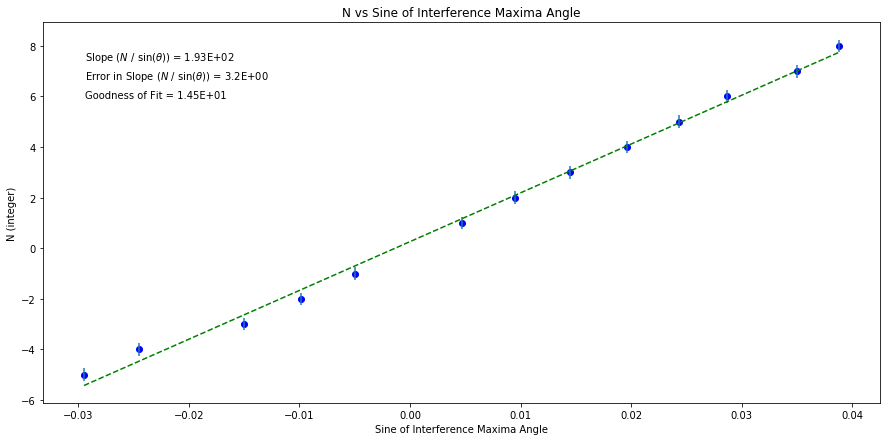

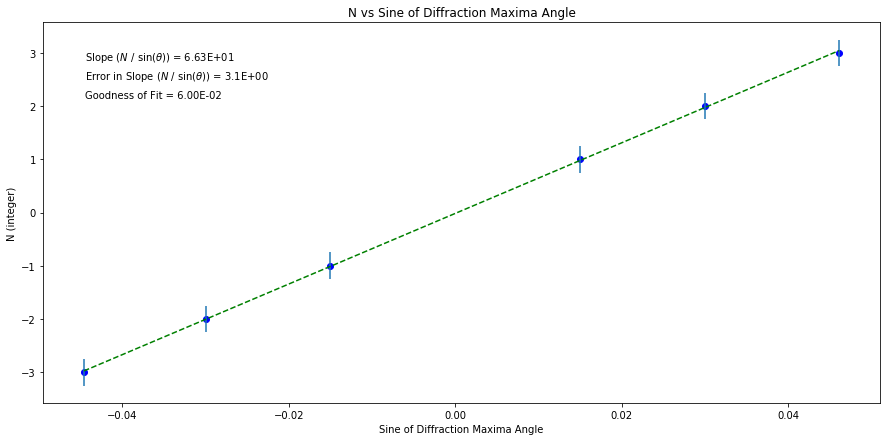

In [244]:
#Interference Plot

theta1 = np.sin(np.arctan(Yint/Lint))

b1,m1=np.polynomial.polynomial.polyfit(theta1,nint,1,w=nint_un)
fit1 = b1+m1*theta1
D1=Delta(theta1, nint_un)
dm1 = np.sqrt(1/D1*sum(1/nint_un**2))
N1 = LLSFD2(theta1,nint,nint_un,b1,m1)

plt.figure(figsize=(15,7))
plt.plot(theta1, fit1, color='green', linestyle='--')
plt.scatter(theta1, nint, color='blue', marker='o')
plt.ylabel('N (integer)'); plt.xlabel('Sine of Interference Maxima Angle'); plt.title('N vs Sine of Interference Maxima Angle')

plt.errorbar(theta1, nint, yerr=nint_un, xerr=None, fmt="none")
plt.annotate(r'Slope ($N$ / sin($\theta$)) = {value:.{digits}E}'.format(value=m1, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.annotate(r'Error in Slope ($N$ / sin($\theta$)) = {value:.{digits}E}'.format(value=dm1, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
plt.annotate('Goodness of Fit = {value:.{digits}E}'.format(value=N1, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
plt.show()

#Diffraction Plot

theta2 = np.sin(np.arctan(Ydif/Ldif))

b2,m2=np.polynomial.polynomial.polyfit(theta2,ndif,1,w=ndif_un)
fit2 = b2+m2*theta2
D2=Delta(theta2, ndif_un)
dm2 = np.sqrt(1/D2*sum(1/ndif_un**2))
N2 = LLSFD2(theta2,ndif,ndif_un,b2,m2)

plt.figure(figsize=(15,7))
plt.plot(theta2, fit2, color='green', linestyle='--')
plt.scatter(theta2, ndif, color='blue', marker='o')
plt.ylabel('N (integer)'); plt.xlabel('Sine of Diffraction Maxima Angle'); plt.title('N vs Sine of Diffraction Maxima Angle')

plt.errorbar(theta2, ndif, yerr=ndif_un, xerr=None, fmt="none")
plt.annotate(r'Slope ($N$ / sin($\theta$)) = {value:.{digits}E}'.format(value=m2, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
plt.annotate(r'Error in Slope ($N$ / sin($\theta$)) = {value:.{digits}E}'.format(value=dm2, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
plt.annotate('Goodness of Fit = {value:.{digits}E}'.format(value=N2, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
plt.show()

In [245]:
#Calculations

intwavelength = d/m1; intwavelength_un = rule4(intwavelength, (d, m1), (d_un, dm1), (1,-1))

difwavelength = a/m2; difwavelength_un = rule4(difwavelength, (a, m2), (a_un, dm2), (1,-1))

print('Our calculated value for wavelength from interference was %.0f +/- %.0f nanometers.\
\nOur calculated value for wavelength from diffraction was %.0f +/- %.0f nanometers.' 
      % (intwavelength*10**9, intwavelength_un*10**9, difwavelength*10**9, difwavelength_un*10**9))

Our calculated value for wavelength from interference was 648 +/- 28 nanometers.
Our calculated value for wavelength from diffraction was 603 +/- 81 nanometers.
